# Flipkart Product Review Analyzer 

### A project based on Natural Language processing

### In the world of Internet shopping, customer feedback plays an important role in making decisions about purchasing a product. By understanding the sentiments expressed in product reviews we can get valuable insights about customer satisfaction and product performance. If a product has a lot of reviews, then it will be very difficult for us to judge all the reviews whether it is good or bad. Sentiment analysis performs this task by processing this review and classifies or clusters them depending upon the requirements of the users. This analysis is comparable to that of subjectivity classification, which intends to separate the sentences based on precise information from the sentences and expresses them as subjective views. To address this need, we are presenting the "Flipkart Product Review Analyzer."
### The Flipkart Product Review Analyzer is an innovative tool that will analyze customer reviews for products listed on Flipkart, one of India's leading e-commerce platforms. with the help of Machine Learning algorithms, it will classify all the reviews corresponding to a product whether it is a good review or bad review. Finally, it will provide a clear idea of how many percent of the total reviewers are giving positive responses and how many of them are giving negative responses.

### How It Works:
### The use of Flipkart Product Review Analyzer is easy. You just need to give it the web link of a product on Flipkart, and it will check all the reviews. Then, it will classify the reviews based on the sentiment of the user whether it is a good or bad review with the help of some popular ML algorithms. Finally, the percentage of good and bad reviews will be shown in a pie chart and the words that are mostly used by reviewers will be shown through a word cloud.

### In short, the Flipkart Product Review Analyzer is a handy tool for understanding what people think about products on Flipkart. Whether you are a shopper looking for the best buys or a company wanting to improve, this tool gives you the information you need in a simple way.


The whole code of the project with description is as follows:


# importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn import naive_bayes

# Importing the dataset

In [2]:
data=pd.read_csv('Dataset.csv',encoding='unicode_escape')

C:\Users\MAINAK BANERJEE\AppData\Local\Temp\ipykernel_9288\718129603.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Dataset.csv',encoding='unicode_escape')


## Preview of the raw data

In [3]:
data.head()

,Product_name,Price,Rate,Review,Summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...


## The only required columns are Rate, Review, Summary

### dropping the remaining columns


In [4]:
data.drop(["Product_name","Price"],axis=1,inplace=True)

In [5]:
data.head()

,Rate,Review,Summary
0,5,Simply awesome,it's really worth every single penny. it works...
1,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,5,Fabulous!,Delivery was delayed by two days except this e...
4,4,Nice product,A Good cooler by Crompton. The height of the c...


# Extracting Basic info

In [6]:
data.shape

(363261, 3)

In [7]:
# Finding the number of null values in each column 
data.isnull().sum()


Rate         16
Review       22
Summary    2022
dtype: int64

In [8]:
data.duplicated().sum()

157848

## dealing with duplicate values 

In [9]:
data.drop_duplicates(keep='first',inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(205413, 3)

### Droping the null values in the respective columns

In [12]:
data.dropna(subset=['Summary'],inplace=True)

In [13]:
data.isnull().sum()

Rate       0
Review     4
Summary    0
dtype: int64

In [14]:
data.dropna(subset=['Review'],inplace=True)

In [15]:
data.isnull().sum()

Rate       0
Review     0
Summary    0
dtype: int64

In [16]:
data.head()

,Rate,Review,Summary
0,5,Simply awesome,it's really worth every single penny. it works...
1,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,5,Fabulous!,Delivery was delayed by two days except this e...
4,4,Nice product,A Good cooler by Crompton. The height of the c...


## data types of the columns 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204195 entries, 0 to 363254
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Rate     204195 non-null  object
 1   Review   204195 non-null  object
 2   Summary  204195 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


# We have the make the Rating column as integer because in future we have to apply condition on the rating column for creating new column "sentiment"

### Removing those rows in which the corresponding "Rate" values are not Numeric

In [18]:
for index,row in data.iterrows():
    try:
        pd.to_numeric(row['Rate'])
    except:
        data.drop(index, inplace=True)
        

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204191 entries, 0 to 363254
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Rate     204191 non-null  object
 1   Review   204191 non-null  object
 2   Summary  204191 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [20]:
data['Rate'] = data['Rate'].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204191 entries, 0 to 363254
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Rate     204191 non-null  int32 
 1   Review   204191 non-null  object
 2   Summary  204191 non-null  object
dtypes: int32(1), object(2)
memory usage: 5.5+ MB


In [22]:
data.shape

(204191, 3)

The problem is solved now 

# Making a new column sentiment according to the Rating

In [23]:
def assign_sentiment(rate):
    if rate > 3:
        return 1
    else:
        return 0

# Apply the function to create a new 'Sentiment' column
data['Sentiment'] = data['Rate'].apply(assign_sentiment)

In [24]:
data.head()

,Rate,Review,Summary,Sentiment
0,5,Simply awesome,it's really worth every single penny. it works...,1
1,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...,1
2,5,Worth every penny,GREAT packaging by seller. As this was the mos...,1
3,5,Fabulous!,Delivery was delayed by two days except this e...,1
4,4,Nice product,A Good cooler by Crompton. The height of the c...,1


### number of positive and negetive sentiment.1 stands for positive and 0 stands for negetive sentiment 

In [25]:
data['Sentiment'].value_counts()

1    149084
0     55107
Name: Sentiment, dtype: int64

# Preprocessing the textual data 

### Lowercasing: Convert all text to lowercase to ensure consistency 

In [26]:
data["Review"]=data["Review"].str.lower()
data["Summary"]=data["Summary"].str.lower()

In [27]:
data.head()

,Rate,Review,Summary,Sentiment
0,5,simply awesome,it's really worth every single penny. it works...,1
1,4,worth the money . desert cooler live up to the...,i bought crompton ozone 75 desert air cooler i...,1
2,5,worth every penny,great packaging by seller. as this was the mos...,1
3,5,fabulous!,delivery was delayed by two days except this e...,1
4,4,nice product,a good cooler by crompton. the height of the c...,1


## Removing punctuation: 

In [28]:
import string, time 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [31]:
data['Review']=data['Review'].apply(remove_punc)

In [32]:
data['Summary']=data['Summary'].apply(remove_punc)

In [33]:
data.head(100)

,Rate,Review,Summary,Sentiment
0,5,simply awesome,its really worth every single penny it works l...,1
1,4,worth the money desert cooler live up to the ...,i bought crompton ozone 75 desert air cooler i...,1
2,5,worth every penny,great packaging by seller as this was the most...,1
3,5,fabulous,delivery was delayed by two days except this e...,1
4,4,nice product,a good cooler by crompton the height of the co...,1
...,...,...,...,...
95,5,brilliant,working well and cooling is also greati liked ...,1
96,5,superexcelleant product,delievered in just 24 hours after the order wh...,1
97,5,fabulous,fantastic air throw and yet quiet fan great c...,1
98,5,brilliant,i ama truly satisfied with the product it cool...,1


In [34]:
data.shape

(204191, 4)

In [35]:
data.duplicated().sum()

20076

In [36]:
data.drop_duplicates(keep='first',inplace=True)

In [37]:
data.shape

(184115, 4)

In [38]:
data['Sentiment'].value_counts()

1    133003
0     51112
Name: Sentiment, dtype: int64

## Distribution of positive and negative sentiment 

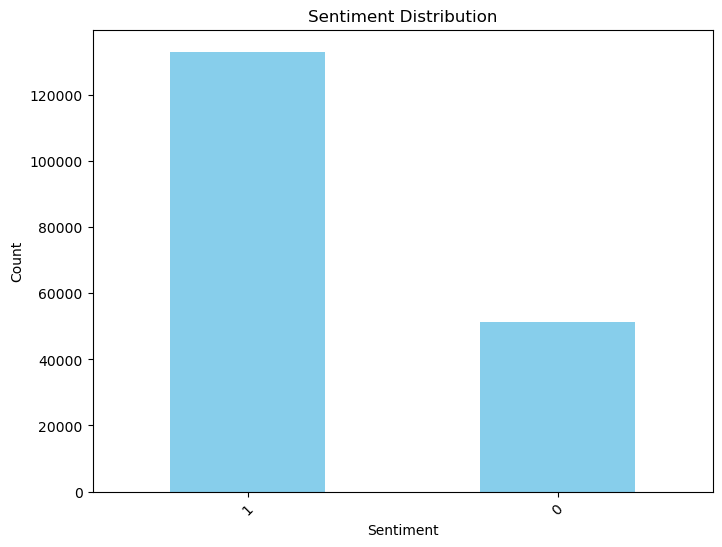

In [39]:


# 'Sentiment' column contains categorical values (e.g., 'positive', 'negative')

# Count the occurrences of each sentiment category
sentiment_counts_old = data['Sentiment'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sentiment_counts_old.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [40]:
sentiment_counts_old

1    133003
0     51112
Name: Sentiment, dtype: int64

Number of positive sentiment is very high than the number of negative sentiment which can lead our model in misdirection.
Also the number of rows in our dataset is very high, we can sample a subset of our dataset with same ratio of positive and negative sentiment

## sampling new dataset from old with same ratio of positive and negative class

In [41]:


# Separate positive and negative class subsets
positive_subset = data[data['Sentiment'] == 1]
negative_subset = data[data['Sentiment'] == 0]

# Count instances in each class
num_positive = len(positive_subset)
num_negative = len(negative_subset)

# Determine the minimum number of instances between positive and negative classes
min_instances = min(num_positive, num_negative)

# Sample instances from each class to create the balanced subset
balanced_subset = pd.concat([
    positive_subset.sample(n=min_instances, random_state=42),
    negative_subset.sample(n=min_instances, random_state=42)
], ignore_index=True)

# Now 'balanced_subset' contains an equal number of positive and negative class instances


## New distribution of the dataset

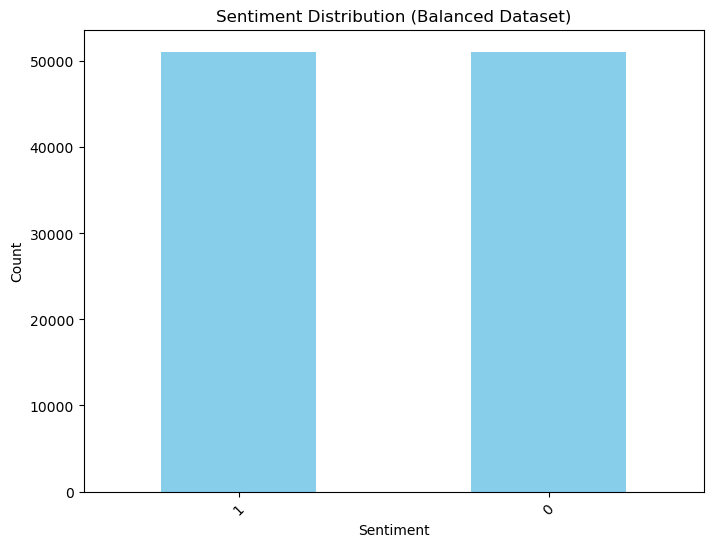

In [42]:

# 'Sentiment' column contains categorical values (e.g., 'positive', 'negative')

# Count the occurrences of each sentiment category
sentiment_counts = balanced_subset['Sentiment'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution (Balanced Dataset)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [43]:
balanced_subset["Sentiment"].value_counts()

1    51112
0    51112
Name: Sentiment, dtype: int64

In [44]:


# Shuffle the rows of the DataFrame
shuffled_data= balanced_subset.sample(frac=1, random_state=42)

# Now 'shuffled_df' contains the DataFrame with shuffled rows


In [45]:
shuffled_data

,Rate,Review,Summary,Sentiment
24015,4,nice product,no comments,1
69113,3,decent product,material quality is poor,0
55353,3,nice,the lid has got no hole to let steam escape it...,0
91078,1,waste of money,its so small,0
96098,1,horrible,bad,0
...,...,...,...,...
6265,4,delightful,good packinggood quality,1
54886,3,fair,just on show piece only so we not use regular ...,0
76820,1,horrible,apps not running,0
860,5,excellent,a simple product with significant functional u...,1


## removing the stop words 

In [46]:

import nltk
# Download NLTK stop words list
nltk.download('stopwords')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    # Split text into words
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the remove_stopwords function to the 'Review' column
shuffled_data['Review'] = shuffled_data['Review'].apply(remove_stopwords)

# Apply the remove_stopwords function to the 'Summary' column
shuffled_data['Summary'] = shuffled_data['Summary'].apply(remove_stopwords)

# Now 'shuffled_df' contains the 'Review' and 'Summary' columns with stop words removed


[nltk_data] Downloading package stopwords to C:\Users\MAINAK
[nltk_data]     BANERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
shuffled_data.head()

,Rate,Review,Summary,Sentiment
24015,4,nice product,comments,1
69113,3,decent product,material quality poor,0
55353,3,nice,lid got hole let steam escape resulted damage ...,0
91078,1,waste money,small,0
96098,1,horrible,bad,0


In [48]:
shuffled_data.reset_index(drop=True, inplace=True)

# Preview of the preprocessed data

In [49]:
shuffled_data.head()

,Rate,Review,Summary,Sentiment
0,4,nice product,comments,1
1,3,decent product,material quality poor,0
2,3,nice,lid got hole let steam escape resulted damage ...,0
3,1,waste money,small,0
4,1,horrible,bad,0


# Word vectorization 

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

summaries = shuffled_data['Review']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to your data and transform the 'Summary' column
summary_vectors = vectorizer.fit_transform(summaries)

# summary_vectors now contains the count vectors for each summary in your DataFrame


In [51]:
summary_vectors

<102224x1422 sparse matrix of type '<class 'numpy.int64'>'
	with 166938 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit the vectorizer to your data and transform the 'Summary' column
x= tfidf_vectorizer.fit_transform(shuffled_data['Review'])




In [53]:
y= shuffled_data['Sentiment']

# Model implementation  

## Naive bayes 

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score


# Split data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, stratify=y)

# Define Naive Bayes classifiers
gaussian_nb = GaussianNB()
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()

# Train the models
gaussian_nb.fit(x_train.toarray(), y_train)
bernoulli_nb.fit(x_train.toarray(), y_train)
multinomial_nb.fit(x_train.toarray(), y_train)

# Make predictions
gaussian_pred = gaussian_nb.predict(x_test.toarray())
bernoulli_pred = bernoulli_nb.predict(x_test.toarray())
multinomial_pred = multinomial_nb.predict(x_test.toarray())

# Calculate accuracy
gaussian_accuracy = accuracy_score(y_test, gaussian_pred)
bernoulli_accuracy = accuracy_score(y_test, bernoulli_pred)
multinomial_accuracy = accuracy_score(y_test, multinomial_pred)

print("Gaussian Naive Bayes Accuracy:", gaussian_accuracy)
print("Bernoulli Naive Bayes Accuracy:", bernoulli_accuracy)
print("Multinomial Naive Bayes Accuracy:", multinomial_accuracy)


Gaussian Naive Bayes Accuracy: 0.911242989435242
Bernoulli Naive Bayes Accuracy: 0.9378179209599583
Multinomial Naive Bayes Accuracy: 0.9534694143732881


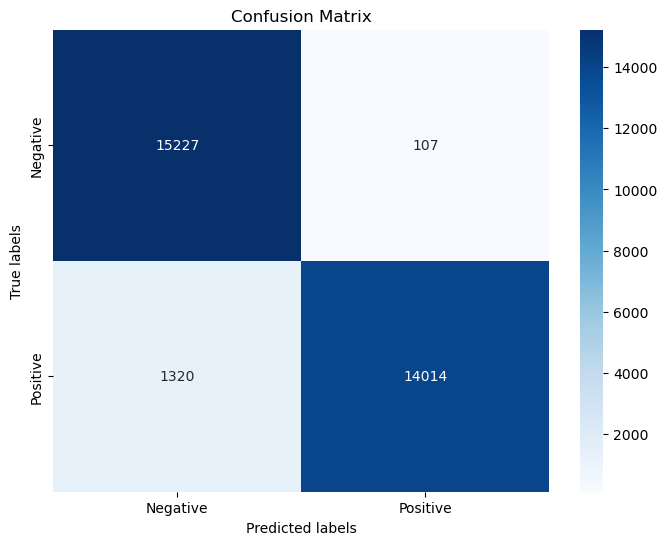

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test,multinomial_pred )

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
x.shape

(102224, 1000)

In [57]:
y.shape

(102224,)

### Prediction Demo

In [58]:
flipkart_review=np.array(["Nice phone, smooth in performance, camera is good, overall great product"])

In [59]:
flipkart_review_vector=tfidf_vectorizer.transform(flipkart_review)
print(gaussian_nb.predict(flipkart_review_vector.toarray()))
print(bernoulli_nb.predict(flipkart_review_vector.toarray()))
print(multinomial_nb.predict(flipkart_review_vector.toarray()))

[1]
[1]
[1]


So multinomial Naive Bayes is giving the best result

## support Vector Machine

In [60]:

from sklearn.svm import SVC


# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=2)  # Polynomial kernel with degree 2
svm_rbf = SVC(kernel='rbf')  # Radial basis function (RBF) kernel
svm_sigmoid = SVC(kernel='sigmoid')  # Sigmoid kernel

# Train the SVM classifiers
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)

# Make predictions on the test set for each classifier
predictions_linear = svm_linear.predict(x_test.toarray())
predictions_poly = svm_poly.predict(x_test.toarray())
predictions_rbf = svm_rbf.predict(x_test.toarray())
predictions_sigmoid = svm_sigmoid.predict(x_test.toarray())

# Calculate accuracy for each classifier
accuracy_linear = accuracy_score(y_test, predictions_linear)
accuracy_poly = accuracy_score(y_test, predictions_poly)
accuracy_rbf = accuracy_score(y_test, predictions_rbf)
accuracy_sigmoid = accuracy_score(y_test, predictions_sigmoid)

print("Linear Kernel SVM Accuracy:", accuracy_linear)
print("Polynomial Kernel SVM Accuracy:", accuracy_poly)
print("RBF Kernel SVM Accuracy:", accuracy_rbf)
print("Sigmoid Kernel SVM Accuracy:", accuracy_sigmoid)


Linear Kernel SVM Accuracy: 0.9790009130037824
Polynomial Kernel SVM Accuracy: 0.9792617712273379
RBF Kernel SVM Accuracy: 0.9793922003391157
Sigmoid Kernel SVM Accuracy: 0.9774357636624494


In [61]:
print("Linear SVM Predictions:", svm_linear.predict(flipkart_review_vector))
print("Poly SVM Predictions:", svm_poly.predict(flipkart_review_vector))
print("RBF SVM Predictions:", svm_rbf.predict(flipkart_review_vector))
print("Sigmoid SVM Predictions:", svm_sigmoid.predict(flipkart_review_vector))

Linear SVM Predictions: [1]
Poly SVM Predictions: [1]
RBF SVM Predictions: [1]
Sigmoid SVM Predictions: [0]


so linear, polynomia and RBF is working with almost same accuracy. Linear kernel can be choosed 

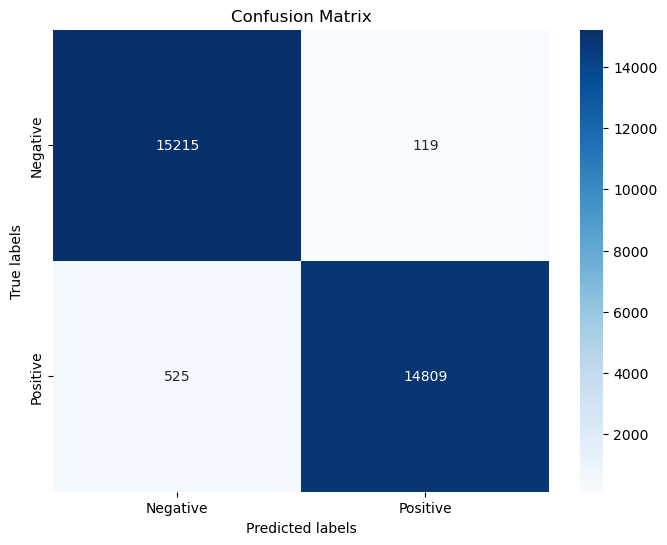

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, predictions_linear)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)



DecisionTreeClassifier()

In [64]:
y_val_pred=dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_val_pred)
print("dt Accuracy:",dt_accuracy)

dt Accuracy: 0.9794574148950046


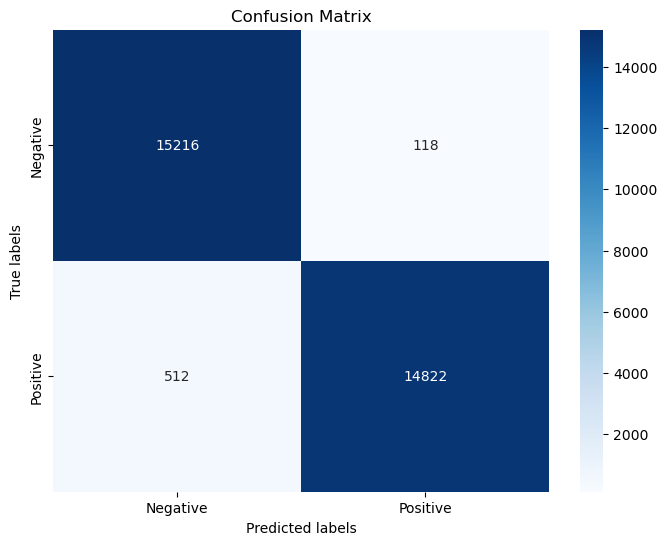

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [66]:
print("decision tree Predictions:", dt.predict(flipkart_review_vector))

decision tree Predictions: [0]


so the final three classifier for voting is multinomial Naivebayes, linear SVM, and decision tree

# Voting ensemble

In [67]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('nb', multinomial_nb), ('svm', svm_linear), ('dt', dt)], voting='hard')

# Train the voting ensemble
voting_clf.fit(x_train, y_train)



VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('svm', SVC(kernel='linear')),
                             ('dt', DecisionTreeClassifier())])

In [68]:
# Predict on the validation set
y_pred_vt = voting_clf.predict(x_test)

# Calculate accuracy on the test set
vt_accuracy = accuracy_score(y_test, y_pred_vt)
print(" Accuracy:", vt_accuracy)





 Accuracy: 0.9795878440067823


In [69]:
print("voting ensemble  Predictions:", voting_clf.predict(flipkart_review_vector))

voting ensemble  Predictions: [1]


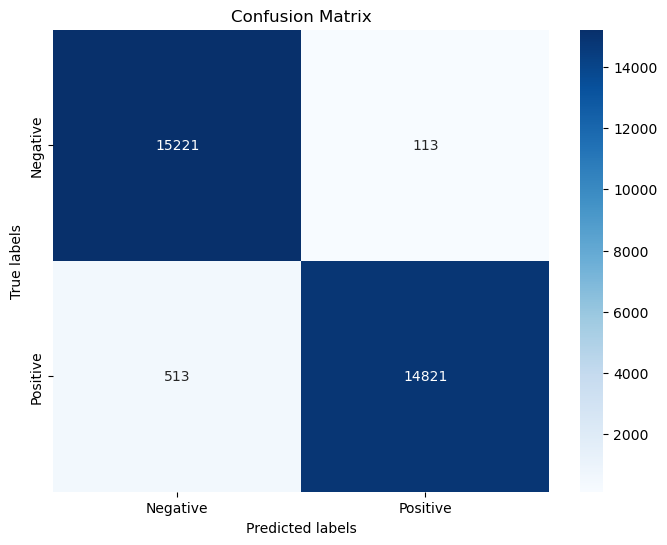

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_vt = confusion_matrix(y_test, y_pred_vt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_vt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Cross Validation and Model Selection

In [71]:

from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation method
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
model=[multinomial_nb,svm_linear,dt,voting_clf]
# Perform cross-validation
for model in model:
    cv_results = (cross_val_score(model, x, y, cv=kfold)).mean()
    print(f"The cross validation score for model {model} is ",cv_results)



The cross validation score for model MultinomialNB() is  0.9543257913498614
The cross validation score for model SVC(kernel='linear') is  0.9798286094675221
The cross validation score for model DecisionTreeClassifier() is  0.9799362185885663
The cross validation score for model VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('svm', SVC(kernel='linear')),
                             ('dt', DecisionTreeClassifier())]) is  0.9803568631599809


Hence the voting ensemble model is giving the best accuracy, voting is selected for further deployment

# Application demostration

## sample list of review of a product in flipkart 

In [72]:
#demo list of review of an product collected from flipkart
laptop_reviews_raw= [
    "Amazing product! The quality exceeded my expectations. Super fast delivery by Flipkart as always.",
    "Not satisfied with the product. It arrived damaged and the customer service was not helpful in resolving the issue.",
    "Great value for money! The product is exactly as described and works perfectly. Highly recommend.",
    "Disappointed with the delivery time. Took longer than expected to arrive.",
    "The product is good but the packaging was not up to the mark. It arrived with some scratches.",
    "Very happy with my purchase! The product arrived in perfect condition and performs exceptionally well.",
    "Average product. Nothing special about it. Delivery was prompt though.",
    "Worst experience ever! Received a completely different product from what was shown on the website.",
    "Excellent customer service! Had an issue with the product and it was quickly resolved by Flipkart's support team.",
    "The product is okay but overpriced in my opinion. Found better deals elsewhere.",
    "Impressed with the quality of the product. It feels sturdy and well-made.",
    "The product looks good but didn't meet my expectations in terms of performance.",
    "Great shopping experience! The website is easy to navigate and checkout process is smooth.",
    "Received the wrong color variant of the product. Disappointed with the mix-up.",
    "Highly disappointed with the product. It stopped working after just a few uses.",
    "Good product at a reasonable price. Happy with my purchase.",
    "The product was delivered on time and in good condition. No complaints.",
    "Terrible product quality. Broke within a week of use.",
    "Very satisfied with the purchase. The product exceeded my expectations.",
    "Average product. Nothing to complain about but nothing exceptional either.",
    "Love the product! Exactly what I was looking for.",
    "Received a defective product. Had to go through a hassle to get a replacement.",
    "The product arrived earlier than expected. Pleasantly surprised by the quick delivery.",
    "Not happy with the product. It feels cheaply made and flimsy.",
    "Great product for the price. Works well and looks stylish.",
    "The product is okay but could be better. Expected more for the price.",
    "Customer service was very helpful in resolving an issue with my order.",
    "The product is exactly as described. No surprises.",
    "Disappointed with the product quality. Doesn't live up to the hype.",
    "Fast and efficient delivery. Very satisfied with the service.",
    "The product arrived damaged. Poor packaging.",
    "Impressed with the durability of the product. It feels robust and well-built.",
    "Product works great! Very happy with the purchase.",
    "Not impressed with the customer service. Was left on hold for too long.",
    "Received the wrong size of the product. Had to return it for a replacement.",
    "Highly recommend this product. Excellent value for money.",
    "The product is exactly what I needed. Works perfectly.",
    "The product looks cheap and feels flimsy. Disappointed with the quality.",
    "Good product. Does the job well.",
    "The product arrived with missing parts. Poor quality control.",
    "Very pleased with the purchase. The product is of high quality.",
    "The product stopped working after a few days. Very disappointed.",
    "Received a damaged product. Not happy with the condition it arrived in.",
    "Excellent product! Highly recommend it to others.",
    "Average product quality. Expected better for the price.",
    "The product is smaller than expected. Should have checked the dimensions.",
    "Fast delivery and excellent packaging. No complaints.",
    "Not satisfied with the product. It doesn't work as advertised.",
    "The product is exactly what I was looking for. Very happy with my purchase.",
    "Received the wrong item. Had to go through the hassle of returning it.",
    "Love the product! Looks great and works perfectly.",
    "Not impressed with the build quality of the product. Feels cheap.",
    "The product is overpriced for what it offers. Expected better value.",
    "Good product for the price. Does what it's supposed to do.",
    "Received the product on time. Happy with the service.",
    "Disappointed with the product. It broke after just a few uses.",
    "The product is of good quality. No complaints.",
    "Poor quality product. Wouldn't recommend it to others.",
    "Happy with the purchase. The product met my expectations.",
    "The product is as described. No surprises.",
    "The product arrived damaged. Not impressed with the packaging.",
    "Very satisfied with the product. It works perfectly.",
    "Average product quality. Expected better for the price.",
    "Received the wrong color variant of the product. Disappointed.",
    "Love the product! Exactly what I was looking for.",
    "Not happy with the product quality. Feels flimsy.",
    "The product is okay but could be better. Expected more.",
    "Great value for money! Highly recommend.",
    "The product arrived earlier than expected. Very pleased.",
    "Poor quality product. Doesn't work as advertised.",
    "Happy with my purchase. No complaints.",
    "The product is exactly as described. Satisfied with the purchase.",
    "Received a defective product. Disappointed.",
    "The product is good for the price. Does the job well.",
    "Disappointed with the customer service. Wasn't helpful.",
    "The product arrived damaged. Poor packaging.",
    "Impressed with the quality of the product. Sturdy and well-made.",
    "Not satisfied with the product. Didn't meet my expectations.",
    "Love the product! Works perfectly.",
    "Received the wrong size of the product. Not happy.",
    "Happy with the purchase. No issues.",
    "The product arrived on time and in good condition.",
    "The product is okay but feels cheaply made.",
    "Excellent product quality. Very happy with my purchase.",
    "The product is overpriced for what it offers. Disappointed.",
    "Fast delivery and good packaging. No complaints.",
    "Received a damaged product. Not satisfied.",
    "Very happy with the purchase. Works well.",
    "Average product. Nothing special about it.",
    "The product arrived earlier than expected. Pleasantly surprised.",
    "Not satisfied with the product quality. Feels flimsy.",
    "Love the product! Highly recommend.",
    "Received the wrong item. Not happy.",
    "Happy with the purchase. Good value for money.",
    "The product is exactly what I needed. Works great.",
    "Average product quality. Expected better.",
    "The product is as described. No issues.",
    "The product arrived damaged. Disappointed.",
    "Happy with the purchase. No complaints.",
    "Not satisfied with the product. Would not recommend."
]


### showing the pie chart and the wordcloud of the review list 

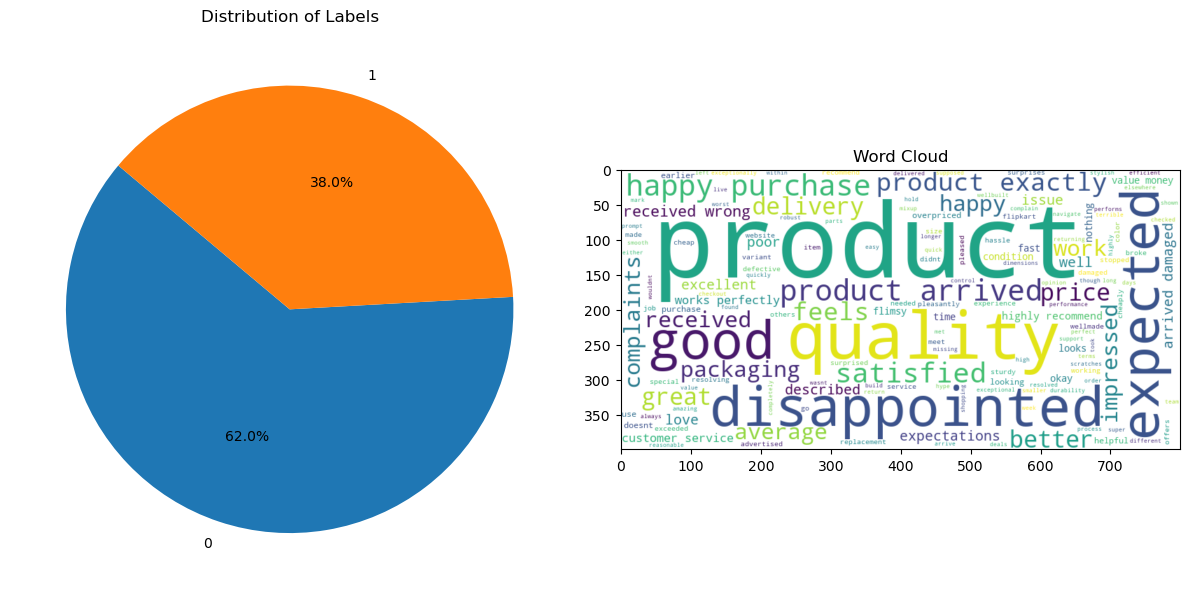

In [73]:
import pandas as pd

# Create a DataFrame from the list of reviews
df = pd.DataFrame({'Reviews': laptop_reviews_raw})


def preprocess_text(text):
    # Lowercase transformation
    text = text.lower()
    
    # Remove punctuation
    text = remove_punc(text)
    
    # Remove stopwords
    text = remove_stopwords(text)
    
    return text

# Apply preprocessing function to the "Reviews" column
df["preprocessed_data"]=df['Reviews'].apply(preprocess_text)

# Display the preprocessed DataFrame
demo_data_vector=tfidf_vectorizer.transform(df["preprocessed_data"])

df["label"]=voting_clf.predict(demo_data_vector)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Pie chart for label attribute
plt.figure(figsize=(12, 6))

# Subplot for the pie chart
plt.subplot(1, 2, 1)
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')

# Word cloud for preprocessed_data attribute
plt.subplot(1, 2, 2)
text_data = ' '.join(df['preprocessed_data'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')

plt.tight_layout()
plt.show()

1: percentage of people who are satisfied with this product                                                                      
0: percentage of people who are not satisfied with this product

# Reviews and the corresponding predicted label

In [74]:
df[['Reviews','label']]

,Reviews,label
0,Amazing product! The quality exceeded my expec...,1
1,Not satisfied with the product. It arrived dam...,0
2,Great value for money! The product is exactly ...,1
3,Disappointed with the delivery time. Took long...,0
4,The product is good but the packaging was not ...,1
...,...,...
95,Average product quality. Expected better.,0
96,The product is as described. No issues.,0
97,The product arrived damaged. Disappointed.,0
98,Happy with the purchase. No complaints.,1


# conclusion

Here the project is completed. We have taken a sample list of a product in flipkart. Then we applied our model to that new 
sample.A pie chart and word cloud has been created. The pie is showing that 37% of the reviewers are sharing positive sentiment about the product and 63% of the reviewers are sharing negative sentiment about that product. Word colud is also showing the words that are mostly used by the reviewers. 

Most challenging task was to prepare the data for model implementation. Then to sampling the dataset by preserving the proportion of positive and Negative class of The original dataset. But overall project was done in smooth way.







